In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
os.system("cp pixelTrain.h5 pixelTrainCopy.h5 ")
df = pandas.HDFStore("pixelTrainCopy.h5", 'r')
os.system("rm pixelTrainCopy.h5")

0

In [4]:
df = df.select("df",stop=-1)
df = df[(df["GenDeltaR"]<0.1) & (df["nUniqueSimTracksInSharedHit"]>-1)]
df = df[(df["isSharedHit"]>0)]

In [6]:
# Select only useful data
cols = ['isSharedHit','trackPt','trackEta','trackPhi','nUniqueSimTracksInSharedHit',  'uniqueSimTrackIds', 'GenDeltaR', 'GenProtonDeltaR', 'GenPionDeltaR', 'sharedHitContainsGenLambda', 'sharedHitContainsGenProton', 'sharedHitContainsGenPion' ]
df = df[cols]
df


,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,uniqueSimTrackIds,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,sharedHitContainsGenLambda,sharedHitContainsGenProton,sharedHitContainsGenPion
1,1,5.279681,-0.096392,5.279681,1.0,[2212],0.001625,4.234024,3.680628,False,True,False
11,1,2.754200,-1.903400,2.754200,2.0,"[-211, 2212]",0.011995,5.605815,4.874523,False,True,True
17,1,6.247725,-1.407947,6.247725,2.0,"[-211, 2212]",0.001147,0.000633,0.000514,False,True,True
31,1,2.774481,-1.903494,2.774481,2.0,"[-211, 2212]",0.012051,5.605792,4.874594,False,True,True
34,1,6.264533,-1.408100,6.264533,2.0,"[-211, 2212]",0.001034,0.000743,0.000291,False,True,True
41,1,5.289252,-0.096428,5.289252,1.0,[2212],0.001670,4.233739,3.680404,False,True,False
45,1,2.758368,-1.903264,2.758368,2.0,"[-211, 2212]",0.011045,5.605747,4.873630,False,True,True
51,1,5.301970,-0.096214,5.301970,1.0,[2212],0.001300,4.233696,3.680763,False,True,False
54,1,6.269919,-1.408117,6.269919,2.0,"[-211, 2212]",0.001033,0.000725,0.000308,False,True,True
66,1,2.758193,-1.903639,2.758193,2.0,"[-211, 2212]",0.012127,5.606075,4.874716,False,True,True


In [8]:
def plotGenDeltaR(df, title):
    
    df = df[df['GenDeltaR']<0.1]

    plt.rcParams.update({'font.size': 14})

    fig= plt.figure(figsize=(10,3))
    ax = fig.add_subplot(1, 1, 1)
    xAxis = np.arange(8)
    xBins = np.arange(0, 7, 0.2)
    plt.hist(df['GenProtonDeltaR'], bins = xBins, label='Proton', alpha = 0.7, color = 'b', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Proton GenDeltaR' %(title))
    ax.set_xticks(xBins - 0.1, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenPionDeltaR'], bins = xBins, label='Pion', alpha = 0.7, color = 'r', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Pion GenDeltaR' %(title))
    ax.set_xticks(xBins - 0.1, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

    fig= plt.figure(figsize=(10,3)) 
    ax = fig.add_subplot(1, 1, 1)
    plt.hist(df['GenDeltaR'], bins = xBins, label='Lambda', alpha = 0.7, color = 'g', align='left')
    plt.xticks(xAxis)
    plt.xlabel('$\Delta$ R')
    plt.ylabel('Number of hits')
    plt.title('%s Hit, Lambda GenDeltaR' %(title))
    ax.set_xticks(xBins - 0.1, minor=True)
    ax.xaxis.grid(True, which='minor')
    plt.show()

In [9]:
# df = events.pandas.df(["Gen*Pt", "Gen*Eta", "Gen*Phi", "Gen*Mass", "Gen*E", "Gen*DeltaR", "nUniqueSimTracksInSharedHit", "sharedHitContainsGen*", "uniqueSimTrackIds"])
df = df[df["nUniqueSimTracksInSharedHit"]>-1]
dfshared = df[df['nUniqueSimTracksInSharedHit']>0]
dfmerged = dfshared[dfshared['nUniqueSimTracksInSharedHit']>1]
dfnotmerged = dfshared[dfshared['nUniqueSimTracksInSharedHit'] == 1]

dfsharedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True)]
dfsharedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True)]
dfsharedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False)]
dfsharedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True)]
dfsharedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False)]

dfmergedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['nUniqueSimTracksInSharedHit']>1)]
dfmergedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True) & dfshared['nUniqueSimTracksInSharedHit']>1]
dfmergedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False) & (dfshared['nUniqueSimTracksInSharedHit']>1)]

dfnotmergedprotonpion = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedprotononly = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == True) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedpiononly = dfshared[(dfshared['sharedHitContainsGenPion'] == True) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['nUniqueSimTracksInSharedHit']==1)]
dfnotmergedlambda = dfshared[(dfshared['sharedHitContainsGenLambda'] == True) & dfshared['nUniqueSimTracksInSharedHit']==1]
dfnotmergedother = dfshared[(dfshared['sharedHitContainsGenPion'] == False) & (dfshared['sharedHitContainsGenProton'] == False) & (dfshared['sharedHitContainsGenLambda'] == False) & (dfshared['nUniqueSimTracksInSharedHit']==1)]


In [10]:
print("Shared, TOTAL: %i" %(len(dfshared)))
print("")
print("Shared, Proton AND Pion: %i" %(len(dfsharedprotonpion)))
print("Shared, Proton Only: %i" %(len(dfsharedprotononly)))
print("Shared, Pion Only: %i" %(len(dfsharedpiononly)))
print("Shared, Contains Lambda: %i" %(len(dfsharedlambda)))
print("Shared, Other: %i" %(len(dfsharedother)))

print("")
print("")
print("Merged, TOTAL: %i" %(len(dfmerged)))
print("")
print("Merged, Proton AND Pion: %i" %(len(dfmergedprotonpion)))
print("Merged, Proton Only: %i" %(len(dfmergedprotononly)))
print("Merged, Pion Only: %i" %(len(dfmergedpiononly)))
print("Merged, ContainsLambda: %i" %(len(dfmergedlambda)))
print("Merged, Other: %i" %(len(dfmergedother)))
print("")
print("")
print("Not Merged, TOTAL: %i" %(len(dfnotmerged)))
print("")
print("Not Merged, Proton AND Pion: %i" %(len(dfnotmergedprotonpion)))
print("Not Merged, Proton Only: %i" %(len(dfnotmergedprotononly)))
print("Not Merged, Pion Only: %i" %(len(dfnotmergedpiononly)))
print("Not Merged, Contains Lambda: %i" %(len(dfnotmergedlambda)))
print("Not Merged, Other: %i" %(len(dfnotmergedother)))



Shared, TOTAL: 879

Shared, Proton AND Pion: 543
Shared, Proton Only: 217
Shared, Pion Only: 40
Shared, Contains Lambda: 0
Shared, Other: 79


Merged, TOTAL: 573

Merged, Proton AND Pion: 543
Merged, Proton Only: 2
Merged, Pion Only: 1
Merged, ContainsLambda: 0
Merged, Other: 27


Not Merged, TOTAL: 306

Not Merged, Proton AND Pion: 0
Not Merged, Proton Only: 215
Not Merged, Pion Only: 39
Not Merged, Contains Lambda: 0
Not Merged, Other: 52


In [13]:
pd.set_option('display.max_colwidth', -1)
dfshared[dfshared['nUniqueSimTracksInSharedHit']>4]

,isSharedHit,trackPt,trackEta,trackPhi,nUniqueSimTracksInSharedHit,uniqueSimTrackIds,GenDeltaR,GenProtonDeltaR,GenPionDeltaR,sharedHitContainsGenLambda,sharedHitContainsGenProton,sharedHitContainsGenPion
2672,1,12.176561,-1.160228,12.176561,6.0,"[211, 211, 211, -211, -211, -211]",0.081814,0.064018,0.017795,False,False,False
20496,1,21.957663,-0.746101,21.957663,20.0,"[-321, -211, 211, 2212, -321, -211, 321, 211, -211, -211, -211, 211, 211, 211, 211, -211, 211, 211, 211, -2212]",0.056690,0.008737,0.047952,False,False,False
20562,1,11.555627,-0.257629,11.555627,10.0,"[211, -211, 2212, -211, -2212, 211, 211, -211, -211, 321]",0.042203,0.024200,0.018003,False,False,False
20669,1,16.542261,0.306854,16.542261,13.0,"[-211, 211, -211, -2212, 211, -211, 211, -211, 211, 211, 211, -211, -2112]",0.045917,0.018015,0.027902,False,False,False


Total Shared Hits: 879


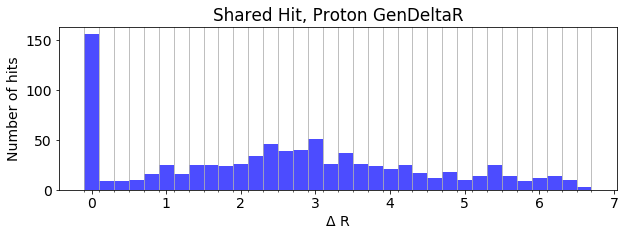

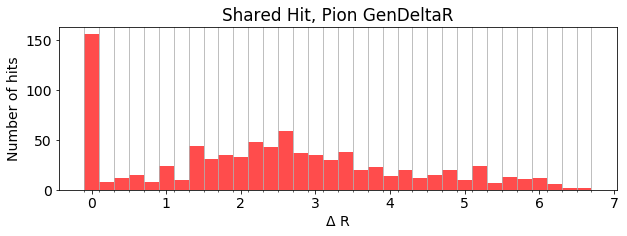

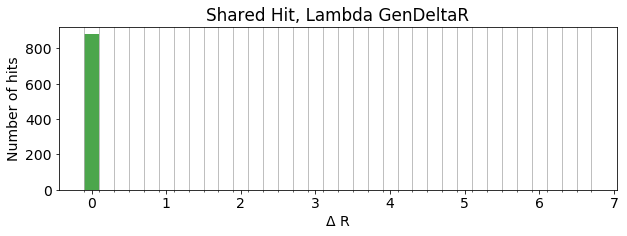

In [14]:
print("Total Shared Hits: %i" %(len(dfshared)))
plotGenDeltaR(dfshared, 'Shared')

Total Merged Hits: 573


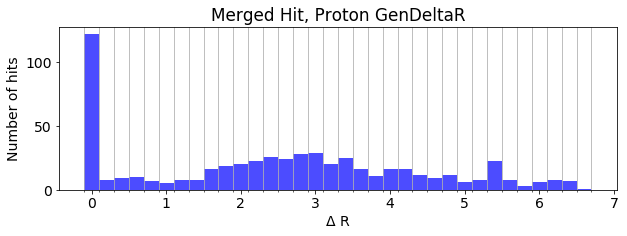

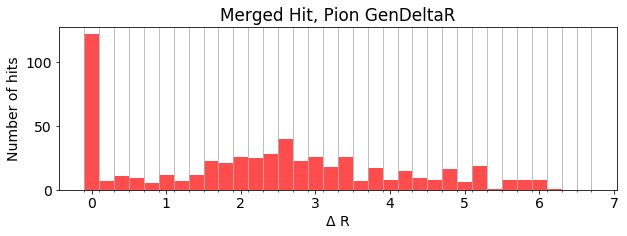

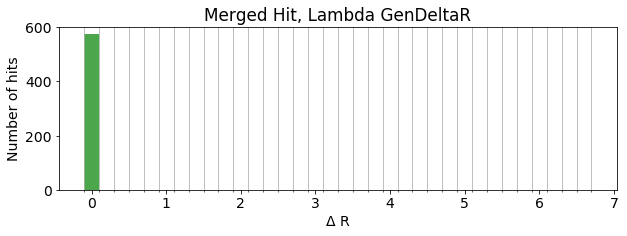

In [15]:
print("Total Merged Hits: %i" %(len(dfmerged)))
plotGenDeltaR(dfmerged, 'Merged')

Total Shared Hits with Proton AND Pion: 543


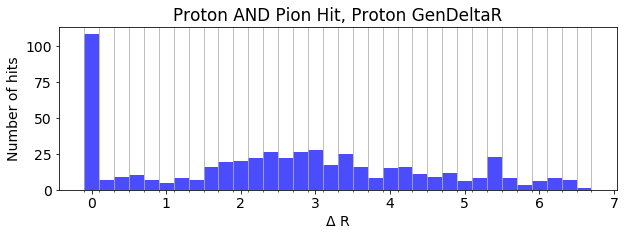

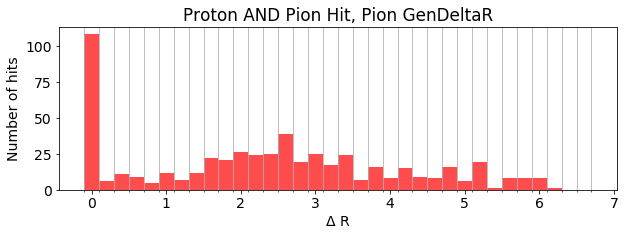

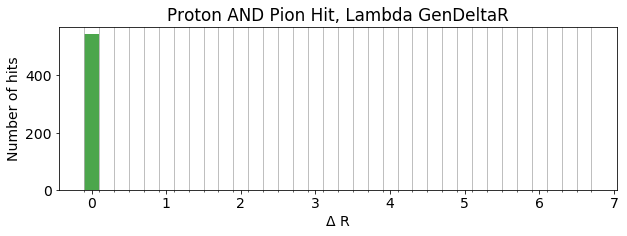

In [16]:
print("Total Shared Hits with Proton AND Pion: %i" %(len(dfsharedprotonpion)))
plotGenDeltaR(dfsharedprotonpion, 'Proton AND Pion')

Total Shared Hits with Proton Only: 217


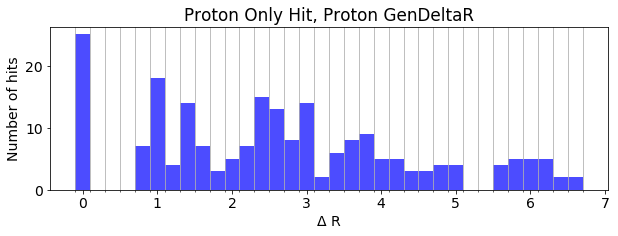

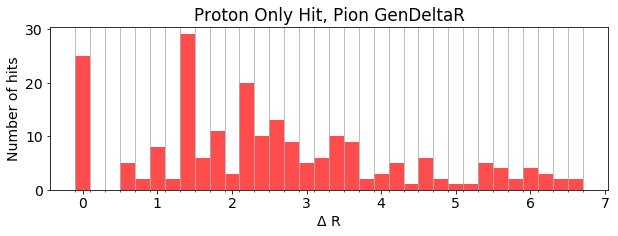

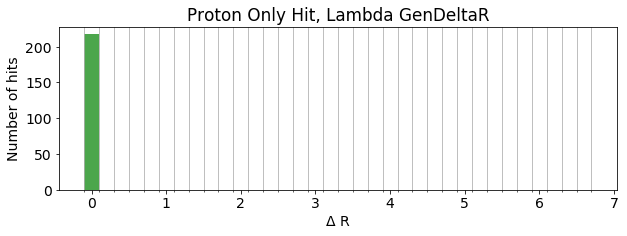

In [17]:
print("Total Shared Hits with Proton Only: %i" %(len(dfsharedprotononly)))
plotGenDeltaR(dfsharedprotononly, 'Proton Only')

Total Shared Hits with Pion Only: 40


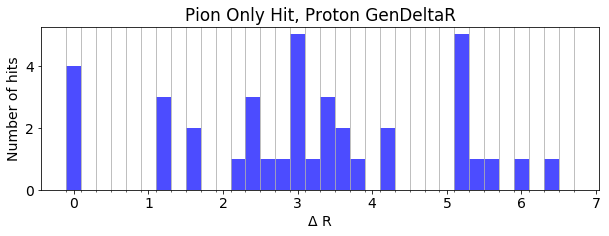

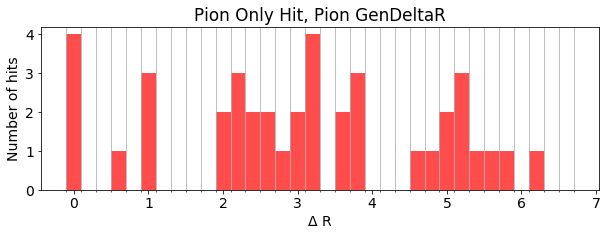

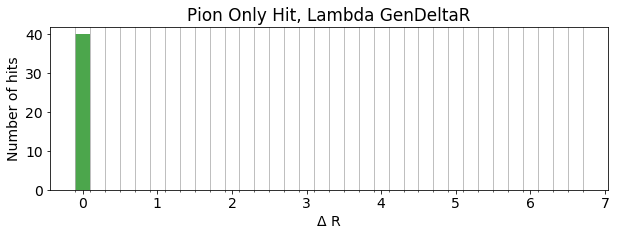

In [18]:
print("Total Shared Hits with Pion Only: %i" %(len(dfsharedpiononly)))
plotGenDeltaR(dfsharedpiononly, 'Pion Only')

Total Shared Hits Containing Lambda: 0


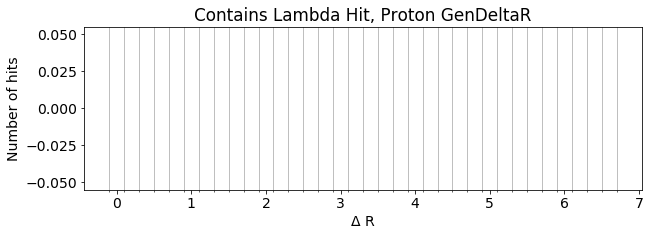

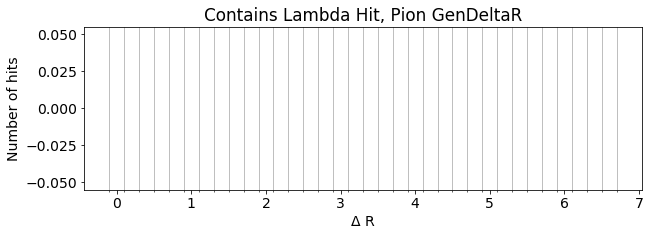

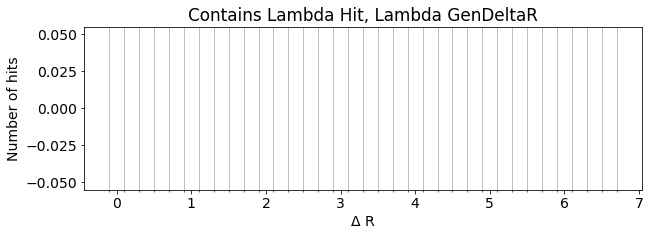

In [19]:
print("Total Shared Hits Containing Lambda: %i" %(len(dfsharedlambda)))
plotGenDeltaR(dfsharedlambda, 'Contains Lambda')